In [1]:
!pip install wikipedia

In [2]:
!pip install pandasql

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandasql as ps
import wikipedia as wiki
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from io import BytesIO

In [10]:
cities = wiki.search('cities')
print(cities)

['City', 'List of largest cities', 'Global city', 'List of cities in Italy', 'Cities: Skylines', 'List of cities in India by population', 'List of cities and towns in Russia by population', 'List of European cities by population within city limits', 'List of cities in Canada', 'List of municipalities in Michigan']


In [11]:
largest = wiki.page('List of largest cities')
largest

<WikipediaPage 'List of largest cities'>

In [12]:
content = largest.content
print(content)

The United Nations uses three definitions for what constitutes a city, as not all cities in all jurisdictions are classified using the same criteria. Cities may be defined as the cities proper, the extent of their urban area, or their metropolitan regions. The largest city by population using the city proper definition, which is the area under the administrative boundaries of a local government, is Chongqing, China. The largest city by population using the metropolitan area definition, which is a loose term referring to urban area and its primary commuter areas, is Tokyo, Japan. The largest city by population using the urban area definition, which is a loose term referring to a contiguous area with a certain population density, is also Tokyo, Japan.


== Definitions ==


=== City proper (administrative) ===

A city can be defined by its administrative boundaries (city proper). UNICEF defines city proper as "the population living within the administrative boundaries of a city or control

In [13]:
categories = largest.categories
print(categories)

['All articles with dead external links', 'All articles with failed verification', 'Articles with dead external links from December 2017', 'Articles with failed verification from May 2021', 'Articles with permanently dead external links', 'Articles with short description', 'CS1 Chinese-language sources (zh)', 'CS1 Portuguese-language sources (pt)', 'CS1 Spanish-language sources (es)', 'CS1 errors: missing periodical', 'CS1 maint: archived copy as title', 'CS1 uses Chinese-language script (zh)', 'Cities-related lists of superlatives', 'Largest things', 'Lists of cities (worldwide) by population', 'Pages using the Kartographer extension', 'Short description is different from Wikidata', 'Urban geography', 'Use dmy dates from October 2020', 'Webarchive template wayback links', 'Wikipedia indefinitely semi-protected pages']


In [14]:
url = largest.url
print(url)

https://en.wikipedia.org/wiki/List_of_largest_cities


In [15]:
print(largest.title)

List of largest cities


In [16]:
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
parse = soup.find('table', {'class':"wikitable"})

200


In [17]:
df = pd.read_html(str(parse))
df = pd.DataFrame(df[0])
print(df.head())

       City[a] Country UN 2018 population estimates[b]         City proper[c]  \
       City[a] Country UN 2018 population estimates[b]             Definition   
0        Tokyo   Japan                        37400068  Metropolis prefecture   
1        Delhi   India                        28514000           Capital City   
2     Shanghai   China                        25582000           Municipality   
3    São Paulo  Brazil                        21650000           Municipality   
4  Mexico City  Mexico                        21581000             City-state   

                                       Metropolitan area[d]            \
   Population Area(km2)  Density(/km2)           Population Area(km2)   
0  13515271.0    2191.0      6,169[14]             37274000   13452.0   
1  16753235.0    1484.0     11,289[16]             29000000    3483.0   
2  24870895.0    6341.0  3,922[18][19]                  NaN       NaN   
3  12252023.0    1521.0      8,055[20]             21734682    7947

In [18]:
df.columns = [f'{i}{j}' for i, j in df.columns]

In [19]:
df.columns = df.columns.map(''.join)

In [20]:
df.head()

,City[a]City[a],CountryCountry,UN 2018 population estimates[b]UN 2018 population estimates[b],City proper[c]Definition,City proper[c]Population,City proper[c]Area(km2),City proper[c]Density(/km2),Metropolitan area[d]Population,Metropolitan area[d]Area(km2),Metropolitan area[d]Density(/km2),Urban area[9]Population,Urban area[9]Area(km2),Urban area[9]Density(/km2)
0,Tokyo,Japan,37400068,Metropolis prefecture,13515271.0,2191.0,"6,169[14]",37274000,13452.0,"2,771[15]",39105000,8231.0,"4,751[e]"
1,Delhi,India,28514000,Capital City,16753235.0,1484.0,"11,289[16]",29000000,3483.0,"8,326[17]",31870000,2233.0,"14,272[f]"
2,Shanghai,China,25582000,Municipality,24870895.0,6341.0,"3,922[18][19]",NaN,NaN,NaN,22118000,4069.0,"5,436[g]"
3,São Paulo,Brazil,21650000,Municipality,12252023.0,1521.0,"8,055[20]",21734682,7947.0,"2,735[21]",22495000,3237.0,"6,949[h]"
4,Mexico City,Mexico,21581000,City-state,9209944.0,1485.0,"6,202[22]",21804515,7866.0,"2,772[23]",21505000,2385.0,9017


In [21]:
df.rename(columns={'City[a]City[a]': 'City', 'CountryCountry': 'Country', 
                   'UN 2018 population estimates[b]UN 2018 population estimates[b]': '2018_Population',
                  'City proper[c]Definition': 'Definition', 'City proper[c]Population': 'City_Population',
                  'City proper[c]Area(km2)': 'City_Area', 'City proper[c]Density(/km2)': 'City_Density', 
                   'Metropolitan area[d]Population': 'Metro_Population', 'Metropolitan area[d]Area(km2)': 'Metro_Area',
                  'Metropolitan area[d]Density(/km2)': 'Metro_Density', 'Urban area[9]Population': 'Urban_Population', 
                  'Urban area[9]Area(km2)': 'Urban_Area', 'Urban area[9]Density(/km2)': 'Urban_Density'}, 
          inplace=True)
df.head()

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
0,Tokyo,Japan,37400068,Metropolis prefecture,13515271.0,2191.0,"6,169[14]",37274000,13452.0,"2,771[15]",39105000,8231.0,"4,751[e]"
1,Delhi,India,28514000,Capital City,16753235.0,1484.0,"11,289[16]",29000000,3483.0,"8,326[17]",31870000,2233.0,"14,272[f]"
2,Shanghai,China,25582000,Municipality,24870895.0,6341.0,"3,922[18][19]",NaN,NaN,NaN,22118000,4069.0,"5,436[g]"
3,São Paulo,Brazil,21650000,Municipality,12252023.0,1521.0,"8,055[20]",21734682,7947.0,"2,735[21]",22495000,3237.0,"6,949[h]"
4,Mexico City,Mexico,21581000,City-state,9209944.0,1485.0,"6,202[22]",21804515,7866.0,"2,772[23]",21505000,2385.0,9017


In [22]:
#df.to_csv('Largest_Cities.csv')

In [23]:
df.sort_values(by=['2018_Population'], ascending = False)

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
0,Tokyo,Japan,37400068,Metropolis prefecture,13515271.0,2191.0,"6,169[14]",37274000,13452.0,"2,771[15]",39105000,8231.0,"4,751[e]"
1,Delhi,India,28514000,Capital City,16753235.0,1484.0,"11,289[16]",29000000,3483.0,"8,326[17]",31870000,2233.0,"14,272[f]"
2,Shanghai,China,25582000,Municipality,24870895.0,6341.0,"3,922[18][19]",NaN,NaN,NaN,22118000,4069.0,"5,436[g]"
3,São Paulo,Brazil,21650000,Municipality,12252023.0,1521.0,"8,055[20]",21734682,7947.0,"2,735[21]",22495000,3237.0,"6,949[h]"
4,Mexico City,Mexico,21581000,City-state,9209944.0,1485.0,"6,202[22]",21804515,7866.0,"2,772[23]",21505000,2385.0,9017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"Washington, D.C.",United States,5207000,Federal district,702455.0,177.0,"3,969[31]",6263245,17009.0,368[100],7583000,5501.0,"1,378[r]"
77,Yangon,Myanmar,5157000,City,NaN,NaN,NaN,NaN,NaN,NaN,6497000,603.0,10774
78,Alexandria,Egypt,5086000,Urban governorate,NaN,NaN,NaN,NaN,NaN,NaN,4857000,293.0,16577
79,Jinan,China,5052000,City (sub-provincial),8700000.0,10244.0,849,NaN,NaN,NaN,4381000,798.0,5490


In [24]:
df.sort_values(by=['Country'])

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
43,Luanda,Angola,7774000,Municipality,2165867.0,116.0,"18,671[76]",NaN,NaN,NaN,8883000,1005.0,8839
12,Buenos Aires,Argentina,14967000,Autonomous city,3054300.0,203.0,"15,046[37]","12,806,866[38]",NaN,NaN,16216000,3222.0,5033
8,Dhaka,Bangladesh,19578000,Capital city,8906039.0,338.0,"26,349[28][29]","14,543,124[30]",NaN,NaN,16839000,456.0,36928
3,São Paulo,Brazil,21650000,Municipality,12252023.0,1521.0,"8,055[20]",21734682,7947.0,"2,735[21]",22495000,3237.0,"6,949[h]"
65,Belo Horizonte,Brazil,5972000,City,2502557.0,331.0,7563,5156217,9459.0,545,5159000,1288.0,4005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,New York,United States,18819000,City,8804190.0,778.0,"11,316[31]",20140470,12093.0,"1,665[32]",23582649,34493.0,684[k]
76,"Washington, D.C.",United States,5207000,Federal district,702455.0,177.0,"3,969[31]",6263245,17009.0,368[100],7583000,5501.0,"1,378[r]"
38,Chicago,United States,8864000,City,2746388.0,589.0,"4,663[31]",9618502,18640.0,516[73],9013000,7006.0,1286
67,Philadelphia,United States,5695000,Consolidated city-county,1526006.0,370.0,4129,6096120,NaN,NaN,5697000,5429.0,1049


In [25]:
df.sort_values(by=['2018_Population'], ascending = False).head(10)

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
0,Tokyo,Japan,37400068,Metropolis prefecture,13515271.0,2191.0,"6,169[14]",37274000,13452.0,"2,771[15]",39105000,8231.0,"4,751[e]"
1,Delhi,India,28514000,Capital City,16753235.0,1484.0,"11,289[16]",29000000,3483.0,"8,326[17]",31870000,2233.0,"14,272[f]"
2,Shanghai,China,25582000,Municipality,24870895.0,6341.0,"3,922[18][19]",NaN,NaN,NaN,22118000,4069.0,"5,436[g]"
3,São Paulo,Brazil,21650000,Municipality,12252023.0,1521.0,"8,055[20]",21734682,7947.0,"2,735[21]",22495000,3237.0,"6,949[h]"
4,Mexico City,Mexico,21581000,City-state,9209944.0,1485.0,"6,202[22]",21804515,7866.0,"2,772[23]",21505000,2385.0,9017
5,Cairo,Egypt,20076000,Urban governorate,9500000.0,3085.0,"3,079[24]",NaN,NaN,NaN,19787000,2010.0,9844
6,Mumbai,India,19980000,Municipality,12478447.0,603.0,"20,694[25]",24400000,4355.0,"5,603[26]",22186000,1008.0,"22,010[27][i]"
7,Beijing,China,19618000,Municipality,21893095.0,16411.0,"1,334[18][19]",NaN,NaN,NaN,19437000,4172.0,4659
8,Dhaka,Bangladesh,19578000,Capital city,8906039.0,338.0,"26,349[28][29]","14,543,124[30]",NaN,NaN,16839000,456.0,36928
9,Osaka,Japan,19281000,Designated city,2725006.0,225.0,"12,111[14]",19303000,13228.0,"1,459[15]",15490000,3020.0,"5,129[j]"


In [26]:
top_twenty = df.head(20)
top_twenty

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
0,Tokyo,Japan,37400068,Metropolis prefecture,13515271.0,2191.0,"6,169[14]",37274000,13452.0,"2,771[15]",39105000,8231.0,"4,751[e]"
1,Delhi,India,28514000,Capital City,16753235.0,1484.0,"11,289[16]",29000000,3483.0,"8,326[17]",31870000,2233.0,"14,272[f]"
2,Shanghai,China,25582000,Municipality,24870895.0,6341.0,"3,922[18][19]",NaN,NaN,NaN,22118000,4069.0,"5,436[g]"
3,São Paulo,Brazil,21650000,Municipality,12252023.0,1521.0,"8,055[20]",21734682,7947.0,"2,735[21]",22495000,3237.0,"6,949[h]"
4,Mexico City,Mexico,21581000,City-state,9209944.0,1485.0,"6,202[22]",21804515,7866.0,"2,772[23]",21505000,2385.0,9017
5,Cairo,Egypt,20076000,Urban governorate,9500000.0,3085.0,"3,079[24]",NaN,NaN,NaN,19787000,2010.0,9844
6,Mumbai,India,19980000,Municipality,12478447.0,603.0,"20,694[25]",24400000,4355.0,"5,603[26]",22186000,1008.0,"22,010[27][i]"
7,Beijing,China,19618000,Municipality,21893095.0,16411.0,"1,334[18][19]",NaN,NaN,NaN,19437000,4172.0,4659
8,Dhaka,Bangladesh,19578000,Capital city,8906039.0,338.0,"26,349[28][29]","14,543,124[30]",NaN,NaN,16839000,456.0,36928
9,Osaka,Japan,19281000,Designated city,2725006.0,225.0,"12,111[14]",19303000,13228.0,"1,459[15]",15490000,3020.0,"5,129[j]"


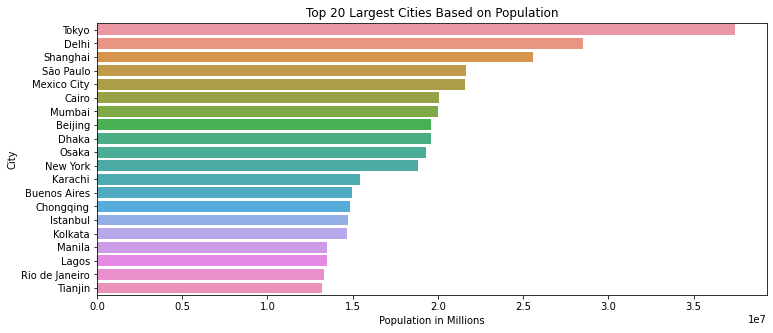

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=top_twenty, y='City', x = '2018_Population')
plt.title('Top 20 Largest Cities Based on Population')
plt.xlabel('Population in Millions')
plt.ylabel('City');

<function matplotlib.pyplot.show(close=None, block=None)>

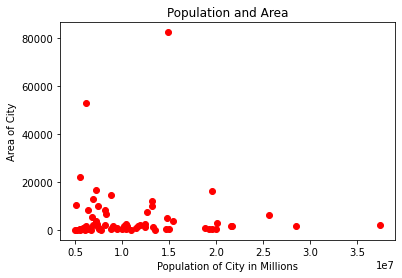

In [28]:
plt.scatter(df['2018_Population'], df['City_Area'], c='red')
plt.title('Population and Area')
plt.xlabel('Population of City in Millions')
plt.ylabel('Area of City');
plt.show

In [29]:
Most_By_Country = """SELECT Country, COUNT(*) as Cities FROM df GROUP BY Country ORDER BY COUNT(*) DESC"""
ps.sqldf(Most_By_Country)

,Country,Cities
0,China,20
1,United States,9
2,India,9
3,Japan,4
4,Brazil,3
5,Spain,2
6,Russia,2
7,Pakistan,2
8,Mexico,2
9,Egypt,2


<AxesSubplot:xlabel='Country', ylabel='City_Population'>

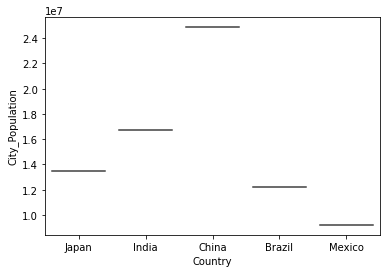

In [30]:
top_five = df.head(5)
sns.violinplot(y = top_five['City_Population'], x = top_five['Country'])

In [31]:
df.sort_values(by=['City_Area'], ascending = False).head(10)

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
13,Chongqing,China,14838000,Municipality,32054159.0,82403.0,389[39][19],NaN,NaN,NaN,8261000,1536.0,5378
59,Harbin,China,6115000,City (sub-provincial),10635971.0,53068.0,200[18],NaN,NaN,NaN,4583000,671.0,6830
70,Khartoum,Sudan,5534000,NaN,639598.0,22142.0,29,5274321,NaN,NaN,6017000,1031.0,5836
49,Hangzhou,China,7236000,City (sub-provincial),9468000.0,16596.0,570[18],NaN,NaN,NaN,6713000,1445.0,4646
7,Beijing,China,19618000,Municipality,21893095.0,16411.0,"1,334[18][19]",NaN,NaN,NaN,19437000,4172.0,4659
39,Chengdu,China,8813000,City (sub-provincial),16044700.0,14378.0,"1,116[18]",NaN,NaN,NaN,11920000,1829.0,6517
51,Shenyang,China,6921000,City (sub-provincial),8294000.0,12980.0,639[18],NaN,NaN,NaN,7208000,1515.0,"4,758[p]"
19,Tianjin,China,13215000,Municipality,13866009.0,11920.0,"1,163[18][19]",NaN,NaN,NaN,10932000,2813.0,3886
79,Jinan,China,5052000,City (sub-provincial),8700000.0,10244.0,849,NaN,NaN,NaN,4381000,798.0,5490
46,Xi'an,China,7444000,City (sub-provincial),8989000.0,10135.0,887[18],NaN,NaN,NaN,7090000,1093.0,6487


In [32]:
df.sort_values(by=['Urban_Area'], ascending = False).head(10)

,City,Country,2018_Population,Definition,City_Population,City_Area,City_Density,Metro_Population,Metro_Area,Metro_Density,Urban_Population,Urban_Area,Urban_Density
10,New York,United States,18819000,City,8804190.0,778.0,"11,316[31]",20140470,12093.0,"1,665[32]",23582649,34493.0,684[k]
0,Tokyo,Japan,37400068,Metropolis prefecture,13515271.0,2191.0,"6,169[14]",37274000,13452.0,"2,771[15]",39105000,8231.0,"4,751[e]"
68,Atlanta,United States,5572000,City,420003.0,354.0,1186,5949951,21690.0,274,5434000,7400.0,734
38,Chicago,United States,8864000,City,2746388.0,589.0,"4,663[31]",9618502,18640.0,516[73],9013000,7006.0,1286
22,Los Angeles,United States,12458000,City,3990456.0,1214.0,"3,287[31]",13291486,12559.0,"1,058[49]",15477000,6351.0,2437
23,Moscow,Russia,12410000,Federal city,13200000.0,2511.0,"5,257[50][51]","20,004,462[52]",NaN,NaN,17693000,5879.0,3010
76,"Washington, D.C.",United States,5207000,Federal district,702455.0,177.0,"3,969[31]",6263245,17009.0,368[100],7583000,5501.0,"1,378[r]"
67,Philadelphia,United States,5695000,Consolidated city-county,1526006.0,370.0,4129,6096120,NaN,NaN,5697000,5429.0,1049
61,Dallas,United States,6099000,City,1345047.0,882.0,"1,525[31]",7470158,22463.0,333[93],6960000,5278.0,"1,319[q]"
60,Houston,United States,6115000,City,2325502.0,1553.0,"1,497[31]",6997384,21395.0,327[92],6529000,4931.0,1324


In [33]:
Most_Common_Definition = """SELECT Definition, COUNT(*) as Total FROM df GROUP BY Definition ORDER BY COUNT(*) DESC, Definition"""
ps.sqldf(Most_Common_Definition)

,Definition,Total
0,Municipality,20
1,City,12
2,City (sub-provincial),12
3,Capital city,4
4,Designated city,3
5,Metropolitan municipality,3
6,Prefecture-level city,3
7,Urban governorate,3
8,Federal city,2
9,Metropolitan city,2


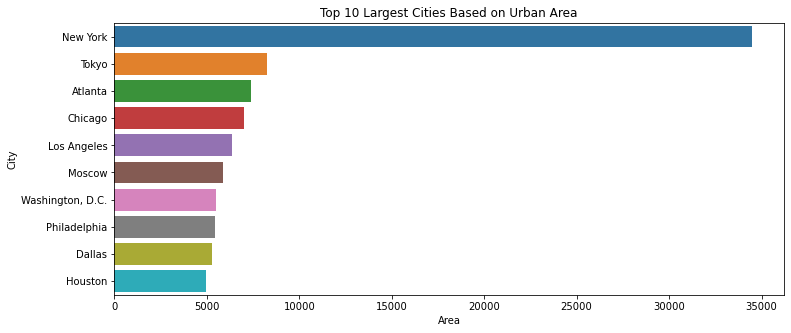

In [34]:
urban = df.sort_values(by=['Urban_Area'], ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=urban, y='City', x = 'Urban_Area')
plt.title('Top 10 Largest Cities Based on Urban Area')
plt.xlabel('Area')
plt.ylabel('City');

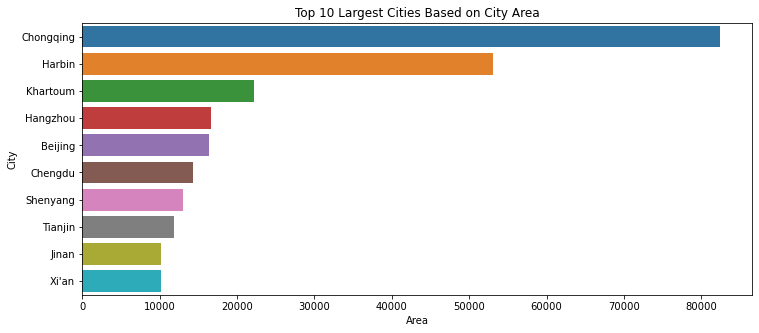

In [35]:
city_area = df.sort_values(by=['City_Area'], ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=city_area, y='City', x = 'City_Area')
plt.title('Top 10 Largest Cities Based on City Area')
plt.xlabel('Area')
plt.ylabel('City');

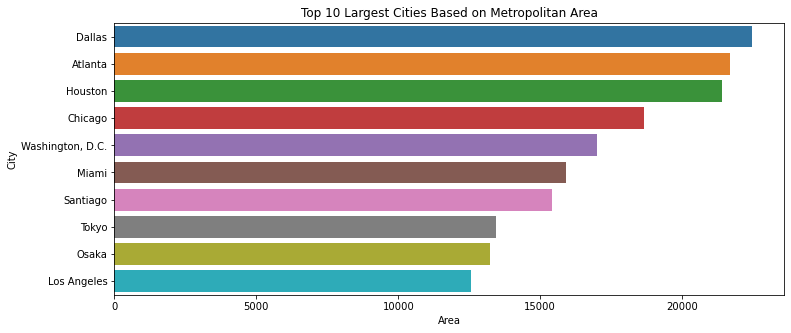

In [36]:
metro_area = df.sort_values(by=['Metro_Area'], ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=metro_area, y='City', x = 'Metro_Area')
plt.title('Top 10 Largest Cities Based on Metropolitan Area')
plt.xlabel('Area')
plt.ylabel('City');

<AxesSubplot:>

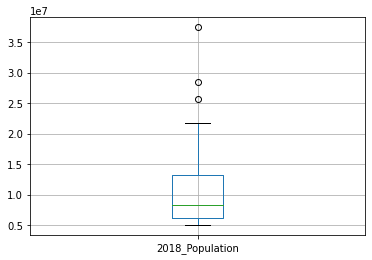

In [37]:
df.boxplot('2018_Population')

In [ ]:
sns.pairplot(df)